# **0. 구글드라이브 마운트**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. 라이브러리 및 데이터**
*   필요 라이브러리 선언


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

*   pandas를 통해 데이터를 읽어들임

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/기계학습텀프/measures_v2.csv')

# **2. 데이터 전처리**
*   입력받은 데이터 train과 test 나누기

예측할 모터의 번호를 65번과 72번으로 설정하고, 나머지는 모두 예측 훈련으로 사용


In [ ]:
df_test = df[(df['profile_id'] == 65) | (df['profile_id'] == 72)]
df = df[(df['profile_id'] != 65) & (df['profile_id'] != 72)]

*   train데이터 전반적인 내용 확인

In [ ]:
df.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.275421e+06,1.275421e+06,1.275421e+06,1.275421e+06,1.275421e+06,1.275421e+06,1.275421e+06,1.275421e+06,1.275421e+06,1.275421e+06,1.275421e+06,1.275421e+06,1.275421e+06
mean,5.467278e+01,3.573907e+01,6.618915e+01,-2.665449e+01,5.664815e+01,2.213150e+03,-6.915157e+01,3.961607e+01,5.830613e+01,4.787477e+01,2.450673e+01,3.296862e+01,3.965771e+01
std,4.401722e+01,2.177377e+01,2.877179e+01,6.263354e+01,2.299736e+01,1.853909e+03,6.500080e+01,9.190634e+01,1.915849e+01,2.000256e+01,1.938694e+00,7.686049e+01,2.496253e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.085696e+01,1.807669e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.211611e+01,1.867717e+01,4.275755e+01,-8.168377e+01,3.817702e+01,4.199994e+02,-1.157185e+02,1.096042e+00,4.265267e+01,3.136627e+01,2.317471e+01,-7.787925e-02,1.600000e+01
50%,4.912165e+01,2.450738e+01,6.498370e+01,-7.612911e+00,5.591809e+01,1.999977e+03,-5.204414e+01,2.110541e+01,6.012479e+01,4.533315e+01,2.475581e+01,1.627305e+01,4.100000e+01
75%,9.017855e+01,4.982456e+01,8.788722e+01,1.305528e+00,7.546349e+01,3.757985e+03,-2.980299e+00,1.058248e+02,7.187637e+01,6.088336e+01,2.614597e+01,9.359407e+01,6.200000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.136066e+02,1.011480e+02,3.071420e+01,2.610057e+02,8.100000e+01


*   전반적인 데이터 분석

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275421 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1275421 non-null  float64
 1   coolant         1275421 non-null  float64
 2   stator_winding  1275421 non-null  float64
 3   u_d             1275421 non-null  float64
 4   stator_tooth    1275421 non-null  float64
 5   motor_speed     1275421 non-null  float64
 6   i_d             1275421 non-null  float64
 7   i_q             1275421 non-null  float64
 8   pm              1275421 non-null  float64
 9   stator_yoke     1275421 non-null  float64
 10  ambient         1275421 non-null  float64
 11  torque          1275421 non-null  float64
 12  profile_id      1275421 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 136.2 MB


*   행과 열의 개수를 출력

In [ ]:
print(df.shape[0],df.shape[1])

1275421 13


*   데이터 결측치 확인

In [ ]:
df.isnull().sum()

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

*   profile_id 기준으로 개수를 나열.

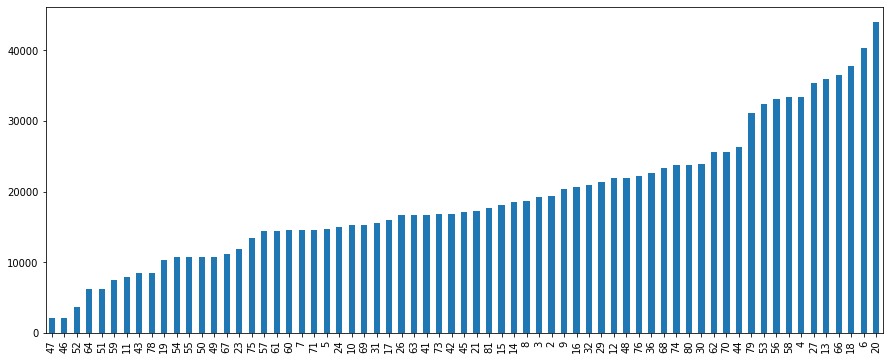

In [ ]:
plt.figure(figsize=(15,6))
df['profile_id'].value_counts().sort_values().plot(kind = 'bar')

*    displot과 boxplot을 이용하여 수치로 확인. 

데이터셋의 값을 살펴봤을 때, 대부분의 경우 중간값과 평균에 가깝게 위치하여 비대칭도가 낮음.


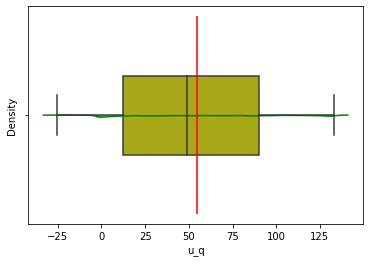

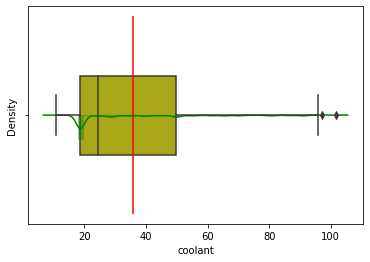

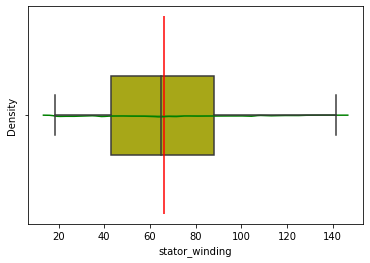

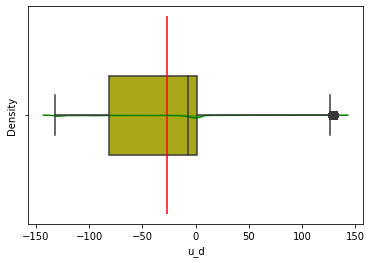

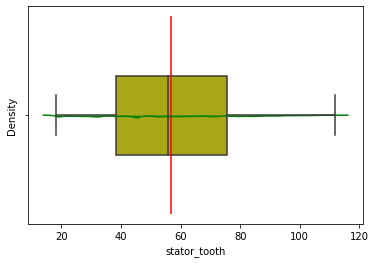

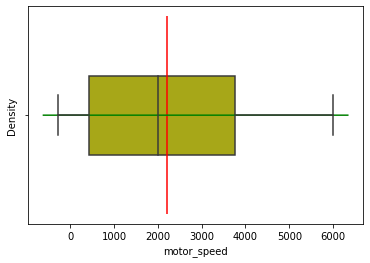

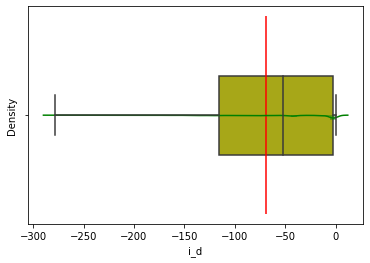

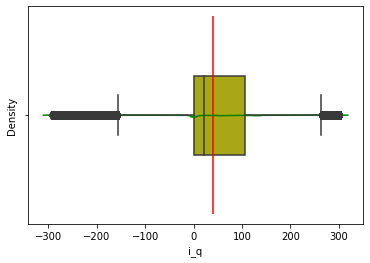

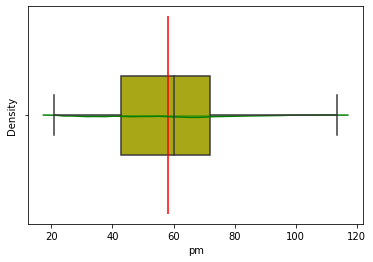

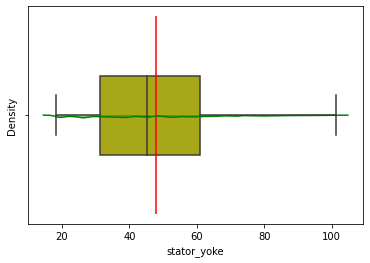

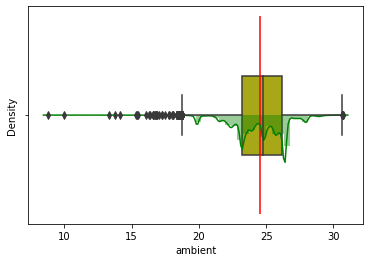

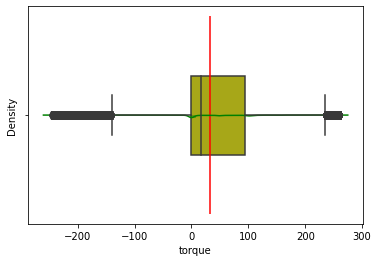

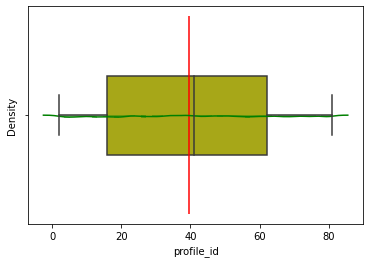

In [ ]:
for i in df.columns:
    sns.distplot(df[i],color='g')
    sns.boxplot(df[i],color = 'y')
    plt.vlines(df[i].mean(),ymin = -1,ymax = 1,color = 'r')
    plt.show()

*  feature들에 따라 왜도와 첨도를 각각 나타냄

In [ ]:
import scipy.stats as stats
for i in df.columns:
    print(i,' :\nSkew : ',df[i].skew(),' : \nKurtosis : ',df[i].kurt())
    print()

u_q  :
Skew :  0.3093132865876392  : 
Kurtosis :  -1.239210771518072

coolant  :
Skew :  1.0888487043987052  : 
Kurtosis :  -0.021890790340000077

stator_winding  :
Skew :  0.16720311839971153  : 
Kurtosis :  -0.8971451729009128

u_d  :
Skew :  0.1516651626219404  : 
Kurtosis :  -0.2839083844119106

stator_tooth  :
Skew :  0.13771148922002294  : 
Kurtosis :  -0.9866791482780313

motor_speed  :
Skew :  0.38787604148630117  : 
Kurtosis :  -1.137311744273765

i_d  :
Skew :  -0.7085542744066505  : 
Kurtosis :  -0.5585873444226577

i_q  :
Skew :  -0.1565769958373659  : 
Kurtosis :  0.6857789800951766

pm  :
Skew :  0.05103424524275566  : 
Kurtosis :  -0.7592788000008919

stator_yoke  :
Skew :  0.493182849183256  : 
Kurtosis :  -0.6078805696564156

ambient  :
Skew :  -0.3061360385026581  : 
Kurtosis :  -0.16213389118610477

torque  :
Skew :  -0.13558359928546612  : 
Kurtosis :  0.681980540377713

profile_id  :
Skew :  0.0813725067343103  : 
Kurtosis :  -1.4086238736810786



*   pm과의 피어슨 상관계수 확인



In [ ]:
corr_matrix = df.corr()
print(corr_matrix["pm"].sort_values(ascending=False))


pm                1.000000
stator_tooth      0.831879
stator_winding    0.795065
stator_yoke       0.756026
ambient           0.514418
motor_speed       0.466834
coolant           0.464922
profile_id        0.390420
u_q               0.120761
torque           -0.107388
i_q              -0.133778
u_d              -0.191684
i_d              -0.432114
Name: pm, dtype: float64


*   히트맵을 통해 feature간의 상관관계를 파악함. 

heatmap에서 토크와 전류의 q성분이 거의 완벽하게 상관되어 있으며, 고정자 요크, 고정자 톱니 및 고정자 권선의 온도 측정 간에는 매우 높은 상관관계가 있으며, pm과도 가장 큰 상관을 가지고 있음.

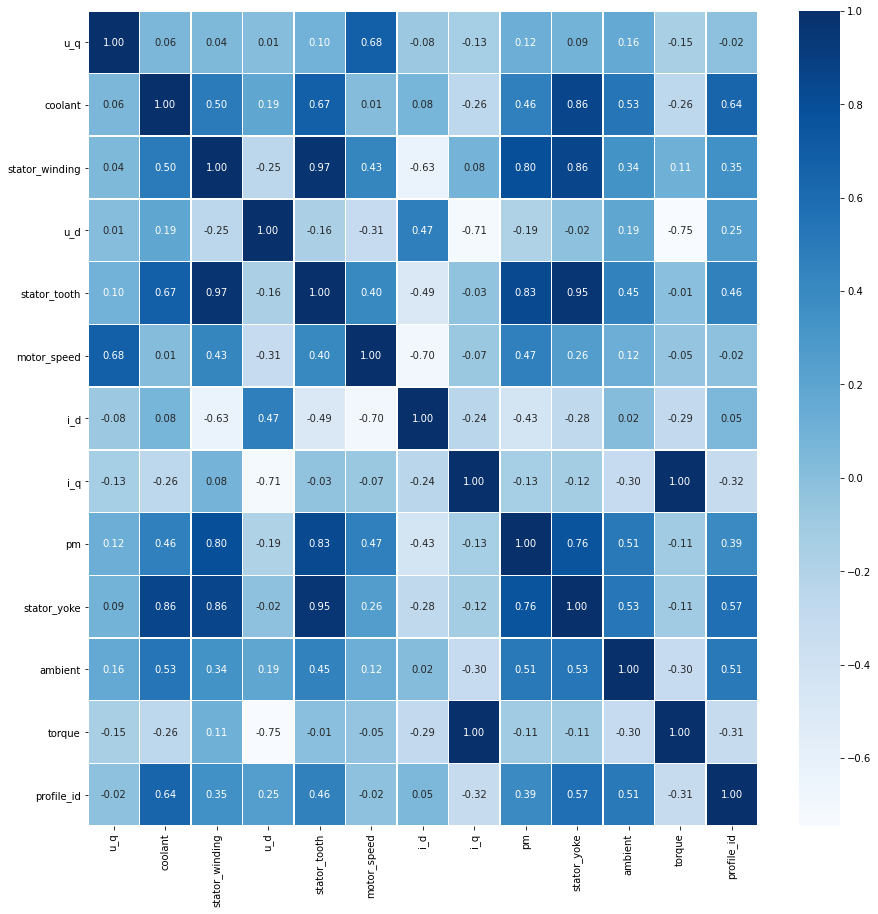

In [ ]:
import seaborn as sns  

plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

*   랜덤 특정을 위해, 3개의 고정자 구성 요소 온도를 비교. 

동일한 프로필ID의 레코드는 시간별로 정렬함.
아래 표와 같이 세가지 고정자 구성요소는 모두 유사한 측정 분산을 보임.


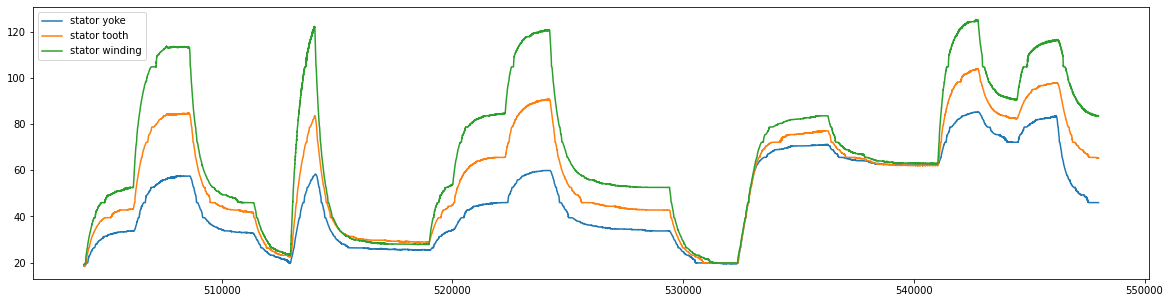

In [ ]:
plt.figure(figsize=(20,5))
df[df['profile_id'] == 20]['stator_yoke'].plot(label = 'stator yoke')
df[df['profile_id'] == 20]['stator_tooth'].plot(label = 'stator tooth')
df[df['profile_id'] == 20]['stator_winding'].plot(label = 'stator winding')
plt.legend()

*   'profile_id' 삭제.

profile_id는 각 측정 세션에 대한 ID이기 때문에, 추가 분석 및 모델 구축에서 제거 가능.

In [ ]:
df.drop('profile_id',axis = 1,inplace=True)
df_test.drop('profile_id',axis = 1,inplace=True)

*   **아래에서부터 온도와 관계되어 보이는 feature들의 특성 확인**

히스토그램을 통해 전반적인 feature들의 특성을 확인

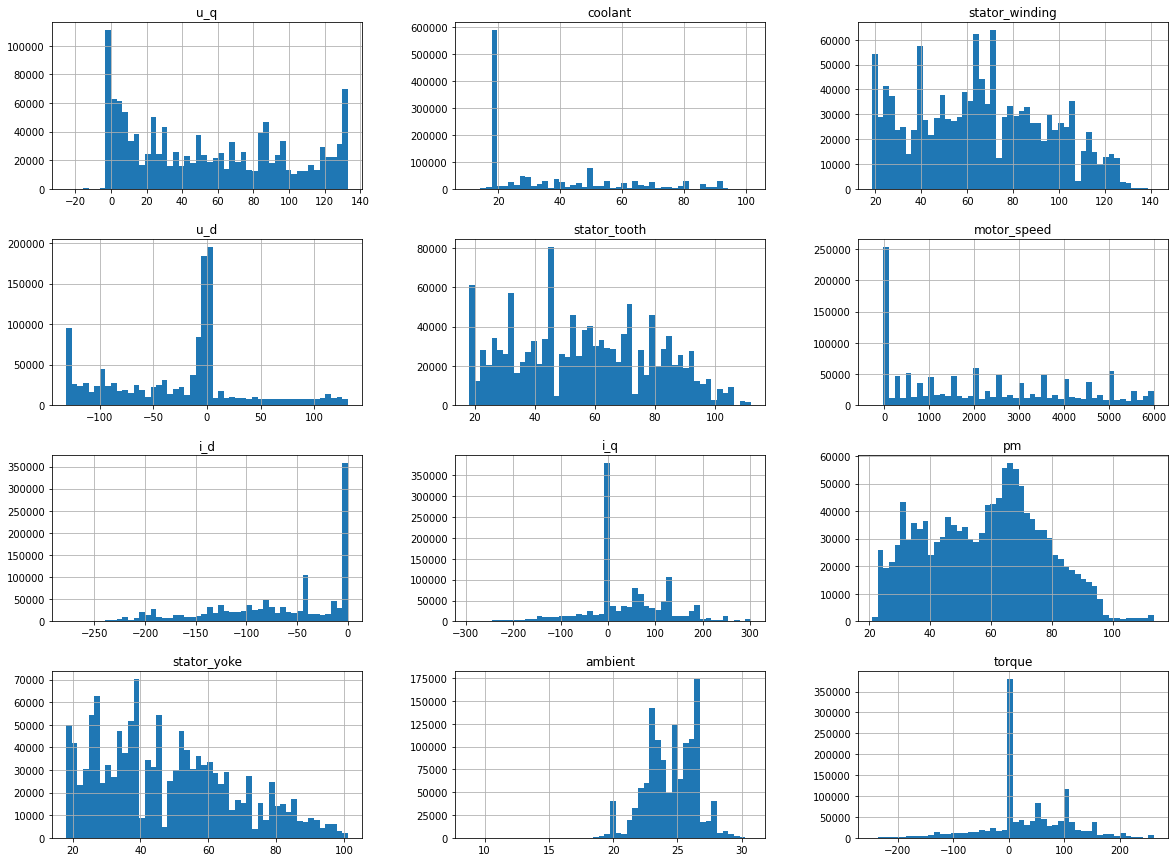

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

*   distplot 함수는 한 연속변수의 분포를 히스토그램과 커널 밀도 추정으로 나타냄. 


*   stator_yoke에 대한 분포를 보여준다

p-value가 0이므로 정규분포를 따르지 않고있음을 알 수 있다.

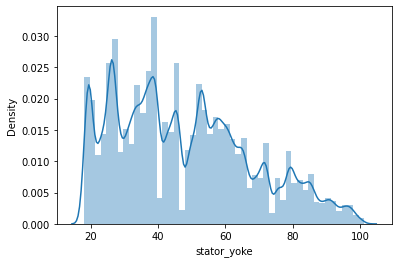

In [ ]:
sns.distplot(df['stator_yoke'])

In [ ]:
from scipy.stats import shapiro
shapiro(df['stator_yoke'])

(0.95875084400177, 0.0)

In [ ]:
  shapiro(df['pm'])

(0.9808728098869324, 0.0)

In [ ]:
from scipy.stats import bartlett
bartlett(df['stator_yoke'],df['pm'])

BartlettResult(statistic=2370.0656325861037, pvalue=0.0)

*  stator_tooth 에 대한 분포를 보여준다

p-value가 0이므로 정규분포를 따르지 않고있음을 알 수 있다.


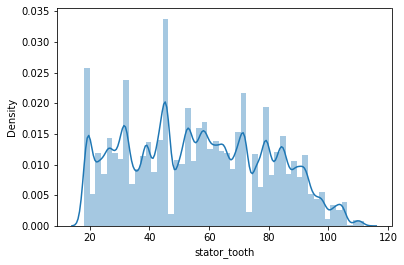

In [ ]:
sns.distplot(df['stator_tooth'])

In [ ]:
from scipy.stats import shapiro
shapiro(df['stator_tooth'])

(0.9709122776985168, 0.0)

In [ ]:
shapiro(df['pm'])

(0.9808728098869324, 0.0)

In [ ]:
from scipy.stats import bartlett
bartlett(df['stator_tooth'],df['pm'])

BartlettResult(statistic=42307.13928204977, pvalue=0.0)

*  stator_winding 에 대한 분포를 보여준다

p-value가 0이므로 정규분포를 따르지 않고있음을 알 수 있다.

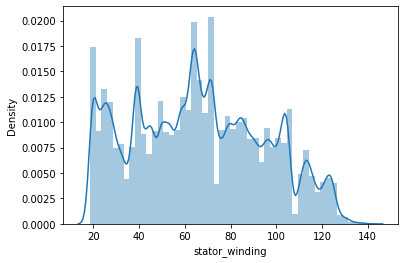

In [ ]:
sns.distplot(df['stator_winding'])

In [ ]:
from scipy.stats import shapiro
shapiro(df['stator_winding'])

(0.9710259437561035, 0.0)

In [ ]:
shapiro(df['pm'])

(0.9808728098869324, 0.0)

In [ ]:
from scipy.stats import bartlett
bartlett(df['stator_winding'],df['pm'])

BartlettResult(statistic=205339.49075355788, pvalue=0.0)

*  ambient 에 대한 분포를 보여준다

p-value가 0이므로 정규분포를 따르지 않고있음을 알 수 있다.

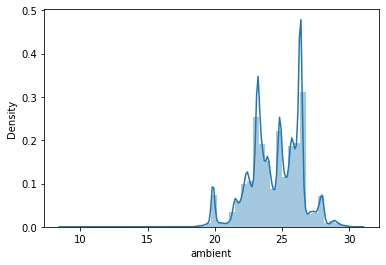

In [ ]:
sns.distplot(df['ambient'])

In [ ]:
from scipy.stats import shapiro
shapiro(df['ambient'])

(0.9706546664237976, 0.0)

In [ ]:
  shapiro(df['pm'])

(0.9808728098869324, 0.0)

In [ ]:
from scipy.stats import bartlett
bartlett(df['ambient'],df['pm'])

BartlettResult(statistic=4101167.6836538445, pvalue=0.0)

*  coolant 에 대한 분포를 보여준다

p-value가 0이므로 정규분포를 따르지 않고있음을 알 수 있다.

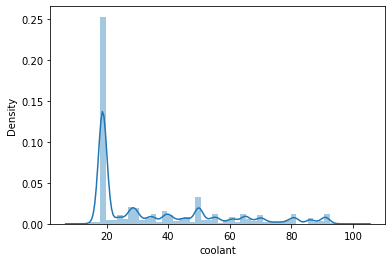

In [ ]:
sns.distplot(df['coolant'])

In [ ]:
from scipy.stats import shapiro
shapiro(df['coolant'])

(0.7938295602798462, 0.0)

In [ ]:
shapiro(df['pm'])

(0.9808728098869324, 0.0)

In [ ]:
from scipy.stats import bartlett
bartlett(df['coolant'],df['pm'])

BartlettResult(statistic=20826.750988393094, pvalue=0.0)

*  u_d 에 대한 분포를 보여준다

p-value가 0이므로 정규분포를 따르지 않고있음을 알 수 있다.



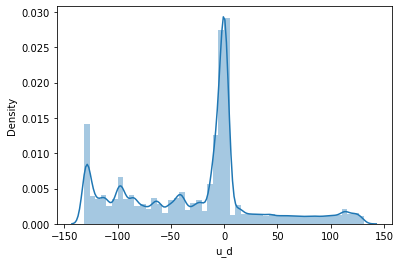

In [ ]:
sns.distplot(df['u_d'])

In [ ]:
from scipy.stats import shapiro
shapiro(df['u_d'])

(0.9374154806137085, 0.0)

In [ ]:
shapiro(df['pm'])

(0.9808728098869324, 0.0)

In [ ]:
from scipy.stats import bartlett
bartlett(df['u_d'],df['pm'])

BartlettResult(statistic=1481654.371986337, pvalue=0.0)

*  u_q 에 대한 분포를 보여준다

p-value가 0이므로 정규분포를 따르지 않고있음을 알 수 있다.

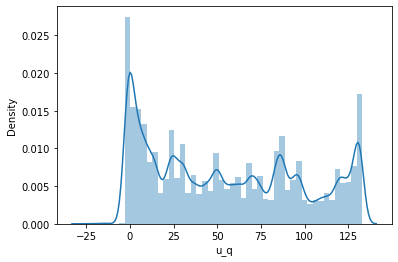

In [ ]:
sns.distplot(df['u_q'])

In [ ]:
from scipy.stats import shapiro
shapiro(df['u_q'])

(0.9175069332122803, 0.0)

In [ ]:
shapiro(df['pm'])

(0.9808728098869324, 0.0)

In [ ]:
from scipy.stats import bartlett
bartlett(df['u_q'],df['pm'])

BartlettResult(statistic=796301.7883673809, pvalue=0.0)

*  motor speed 에 대한 분포를 보여준다

p-value가 0이므로 정규분포를 따르지 않고있음을 알 수 있다.

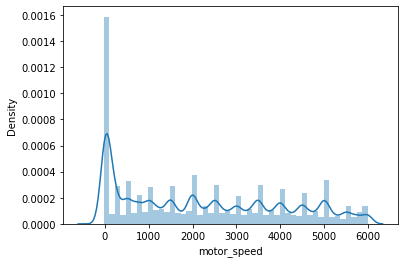

In [ ]:
sns.distplot(df['motor_speed'])

In [ ]:
from scipy.stats import shapiro
shapiro(df['motor_speed'])

(0.9139756560325623, 0.0)

In [ ]:
shapiro(df['pm'])

(0.9808728098869324, 0.0)

In [ ]:
from scipy.stats import bartlett
bartlett(df['motor_speed'],df['pm'])

BartlettResult(statistic=9895381.588014973, pvalue=0.0)

*  i_d 에 대한 분포를 보여준다

p-value가 0이므로 정규분포를 따르지 않고있음을 알 수 있다.

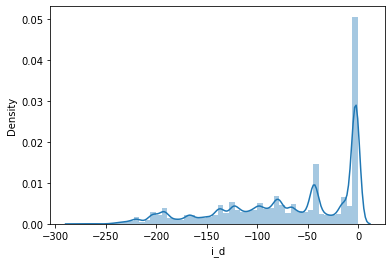

In [ ]:
sns.distplot(df['i_d'])

In [ ]:
from scipy.stats import shapiro
shapiro(df['i_d'])

(0.890301525592804, 0.0)

In [ ]:
 shapiro(df['pm'])

(0.9808728098869324, 0.0)

In [ ]:
from scipy.stats import bartlett
bartlett(df['i_d'],df['pm'])

BartlettResult(statistic=1560631.994601327, pvalue=0.0)

*  i_q 에 대한 분포를 보여준다

p-value가 0이므로 정규분포를 따르지 않고있음을 알 수 있다.

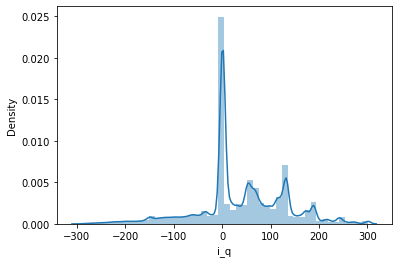

In [ ]:
sns.distplot(df['i_q'])

In [ ]:
from scipy.stats import shapiro
shapiro(df['i_q'])

(0.9663367867469788, 0.0)

In [ ]:
shapiro(df['pm'])

(0.9808728098869324, 0.0)

In [ ]:
from scipy.stats import bartlett
bartlett(df['i_q'],df['pm'])

BartlettResult(statistic=2340173.9737633625, pvalue=0.0)

*각각의 검증에 따라 p-value를 확인했을 때, 대립가설과 귀무가설 모두가 선택 가능하므로 이 모델은 multicollinarity를 가짐.*

*   데이터 셔플


profile id에 따라 데이터가 점진적으로 증가 및 감소하기 때문에, 원활한 학습을 위해 데이터 셔플이 필요함.

(시계열 데이터로 보기 어려움이 있다고 판단됨.)

In [ ]:
df = df.sample(frac=1,random_state=3)

*  셔플된 데이터 확인을 위해 위에서 5줄 확인

In [ ]:
df.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
1156258,68.140769,49.826015,72.119759,-112.354770,63.272699,1999.974323,-81.850999,186.756996,62.373185,56.108505,25.006901,1.500000e+02
1245454,88.200387,15.545175,47.438418,66.086288,43.622875,2146.311861,-23.488569,-90.627271,63.702742,34.297742,26.376948,-6.760281e+01
1278012,39.680487,79.561863,104.349471,-40.979818,95.067912,940.078269,-43.599374,133.940269,70.006937,88.248081,26.384509,1.009808e+02
837236,107.628916,28.862578,46.042685,75.219129,41.929371,3851.501120,-88.761109,-61.231969,50.508079,36.447045,25.904947,-5.310407e+01
907941,0.218337,87.786150,97.769524,-0.784203,93.302222,-0.002244,-2.000559,1.097907,83.384667,89.777196,26.326722,-1.415422e-22


# **3. 탐색적 자료 분석**

*   그래프를 통한 featrue들과 pm간의 산포도 확인

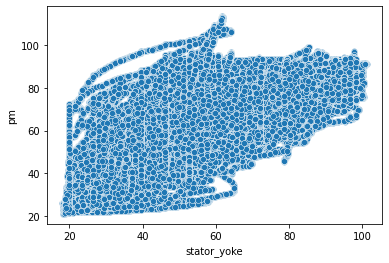

In [ ]:
sns.scatterplot(df['stator_yoke'],df['pm'])

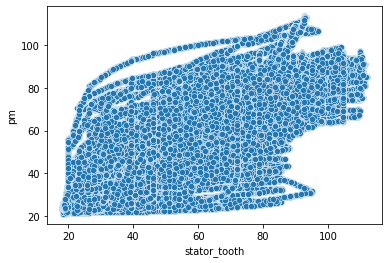

In [ ]:
sns.scatterplot(df['stator_tooth'],df['pm'])

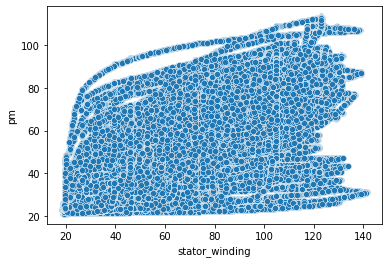

In [ ]:
sns.scatterplot(df['stator_winding'],df['pm'])

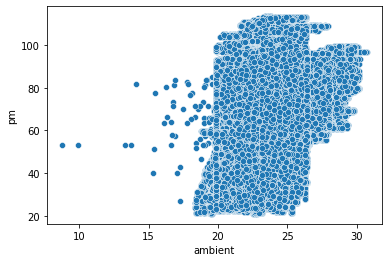

In [ ]:
sns.scatterplot(df['ambient'],df['pm'])

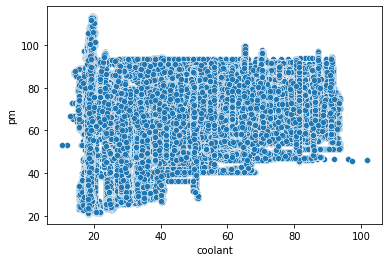

In [ ]:
sns.scatterplot(df['coolant'],df['pm'])

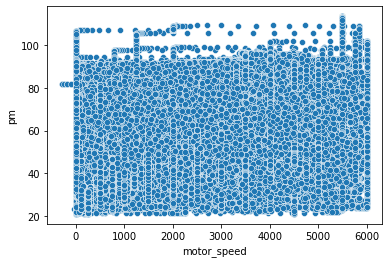

In [ ]:
sns.scatterplot(df['motor_speed'],df['pm'])

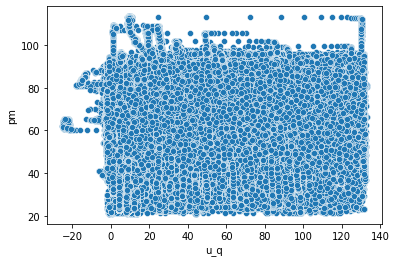

In [ ]:
sns.scatterplot(df['u_q'],df['pm'])

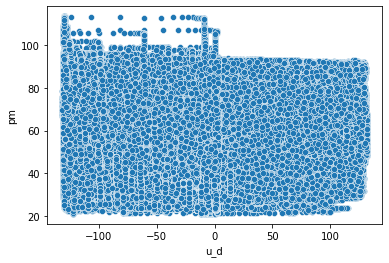

In [ ]:
sns.scatterplot(df['u_d'],df['pm'])

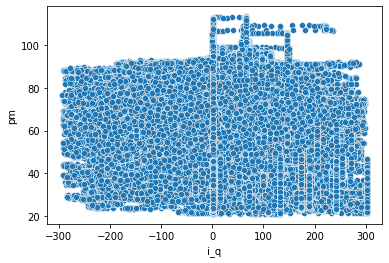

In [ ]:
sns.scatterplot(df['i_q'],df['pm'])

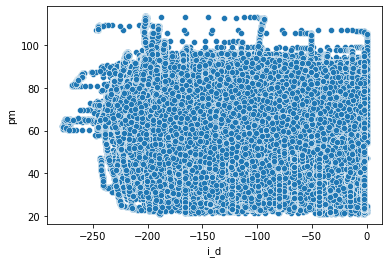

In [ ]:
sns.scatterplot(df['i_d'],df['pm'])

*   test train데이터 분할 및 불필요 feature 제거 

pm온도 예측할 것이므로 pm값 제거.

토크의 경우 일반적인 시스템에서 측정이 어려우므로 캡스톤디자인 목표에 맞게 토크또한 제거.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = df.drop(['pm','torque'],axis = 1)
X_df_test = df_test.drop(['pm','torque'],axis = 1)
mm = MinMaxScaler()
X = mm.fit_transform(X)
X_df_test = mm.fit_transform(X_df_test)
y = df['pm']
y_df_test = df_test['pm']
X = pd.DataFrame(X,columns = ['stator_yoke', 'stator_tooth', 'stator_winding', 'ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d','i_q'])
X_df_test = pd.DataFrame(X_df_test,columns = ['stator_yoke', 'stator_tooth', 'stator_winding','ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d','i_q'])
y.reset_index(drop = True,inplace = True)
y_df_test.reset_index(drop = True,inplace = True)

*   분할 후 대략적인 결과 확인

In [ ]:
print(X.shape)
print(y.shape)

(1275421, 10)
(1275421,)


*   스케일링 후 features 별로 편향된 데이터 분포 재확인

0.30931328658763674


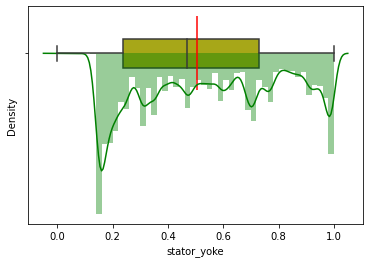

1.0888487043987054


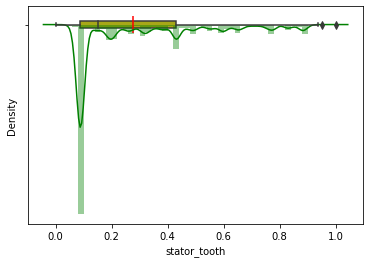

0.16720311839971


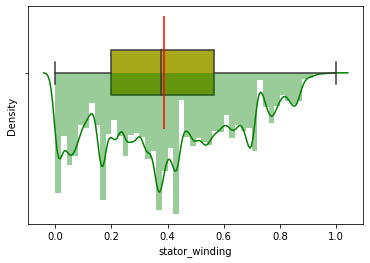

0.15166516262193971


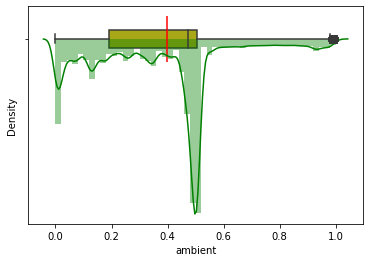

0.1377114892200236


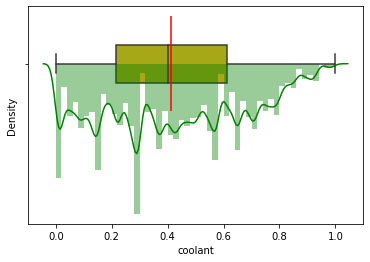

0.38787604148630245


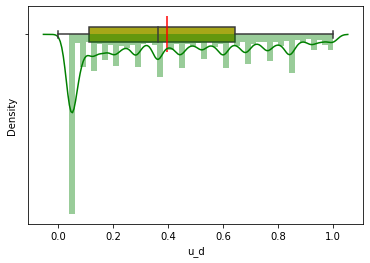

-0.7085542744066496


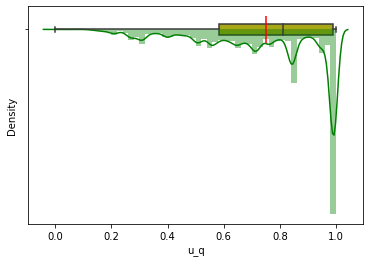

-0.156576995837365


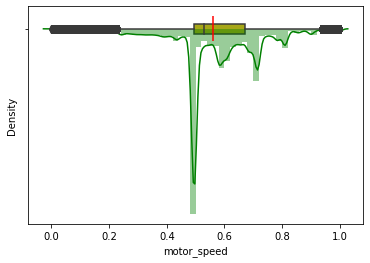

0.49318284918325433


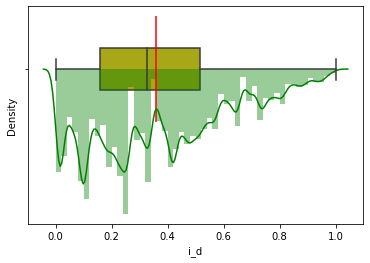

-0.306136038502652


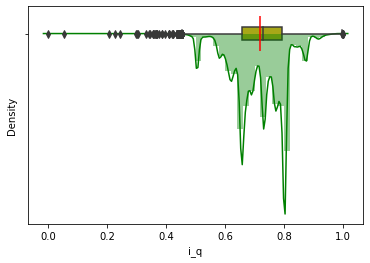

In [ ]:
for i in X.columns:
    print(X[i].skew())
    sns.distplot(X[i],color='g')
    sns.boxplot(X[i],color = 'y')
    plt.vlines(X[i].mean(),ymin = -1,ymax = 1,color = 'r')
    plt.show()

# **4. 변수 선택 및 모델 구축**

*   train_test_split을 이용하여 train과 test를 7:3으로 분할

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

*  선형회귀모델 분석을 위한 api import 및 분석 정보 출력

In [ ]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_train_const).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 5.313e+05
Date:                Wed, 16 Jun 2021   Prob (F-statistic):               0.00
Time:                        04:13:03   Log-Likelihood:            -3.0379e+06
No. Observations:              892794   AIC:                         6.076e+06
Df Residuals:                  892783   BIC:                         6.076e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.8597      0.161     23.930      0.000       3.544       4.176
stator_yoke      -21.1824      0.064   -330.251      0.000     -21.308     -21.057
stator_tooth     -16.5596      0.220    -75.230      0.000     -16.991     -16.128
stator_winding  -198.9873      0.469   -424.698      0.000    -199.906    -198.069
ambient           -5.0649      0.061    -82.573      0.000      -5.185      -4.945
coolant          376.1221      0.880    427.283      0.000     374.397     377.847
u_d               18.6634      0.102    183.739      0.000      18.464      18.862
u_q               11.7231      0.105    111.835      0.000      11.518      11.929
motor_speed       -3.2281      0.098    -33.047      0.000      -3.420      -3.037
i_d             -132.4495      0.698   -189.766      0.000    -133.817    -131.082
i_q               38.4711      0.112    344.489      0.000      38.252      38.690
==============================================================================
Omnibus:                    88282.614   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           237436.417
Skew:                           0.563   Prob(JB):                         0.00
Kurtosis:                       5.262   Cond. No.                         286.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*   회귀 적합성 확인을 위한 rainbow 테스트

In [ ]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(lin_reg)

(1.0050691950055484, 0.04559541206342671)

*   api를 통해 등분산성 테스트

1에 가까우므로 정규분포를 따른다 할 수 있음.

In [ ]:
from statsmodels.stats.api import het_goldfeldquandt
het_goldfeldquandt(lin_reg.resid,lin_reg.model.exog)

(0.9975674604914312, 0.7920643849467818, 'increasing')

*   잔차 분산 2개의 부분 표본에서 동일 여부 검사

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_const.values,i) for i in range(X_train_const.shape[1])]
pd.DataFrame(vif,index=X_train_const.columns)

,0
const,439.451631
stator_yoke,5.368344
stator_tooth,46.880861
stator_winding,203.798136
ambient,3.602582
coolant,787.033976
u_d,15.200755
u_q,10.145551
motor_speed,3.844818
i_d,477.234353


* 'density'에 잔차  차트 출력

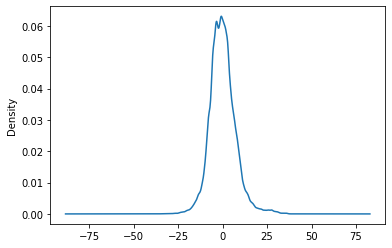

In [ ]:
lin_reg.resid.plot(kind = 'density')

*   QQ플롯을 사용하여 정규분포 가정이 적합한지 확인

그래프에서 알 수 있듯이 잔차는 정규분포를 따르지만, 일부 정규분포를 벗어나는 부분을 확인할 수 있음.



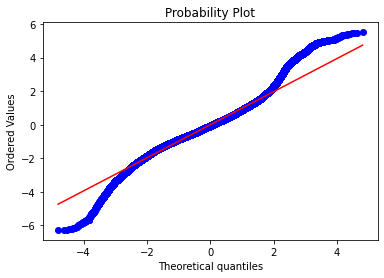

In [ ]:
import scipy.stats as stats
import pylab
st_residual = lin_reg.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

*   선형회귀를 이용한 train의 총 rmse 확인

In [ ]:
y_train_pred = lin_reg.predict(X_train_const)
train_rmse = np.sqrt(np.sum(((y_train-y_train_pred)**2))/len(y_train))
train_rmse

7.269985287428541

*   선형회귀 모델을 통해 test

In [ ]:
X_test_const = sm.add_constant(X_test)
y_test_pred = lin_reg.predict(X_test_const)
y_test_pred

1100863    37.684298
1190059    57.794466
1222617    35.677784
837236     41.145285
907941     45.644659
             ...    
338738     75.395567
460532     40.224024
597142     59.938670
544639     92.716341
327018     76.791290
Length: 382627, dtype: float64

*   test의 총 rmse 확인

In [ ]:
test_rmse = np.sqrt(np.sum(((y_test-y_test_pred)**2))/len(y_test))
test_rmse

7.284136804779439

*   r-squared 값을조정

In [ ]:
lin_reg.rsquared_adj

0.8561354436007291

*   치우친 데이터 변환(이상치 제한)

In [ ]:
X_trans = X
X_trans['coolant'] = np.power(X_trans['coolant'],1/3)
X_trans['ambient'] = np.power(X_trans['ambient'],3)
X_trans['i_d'] = np.power(X_trans['i_d'],3)

*   이상치 제한 후 각각의 feature에 대한 boxplot 구현

0.30931328658763674


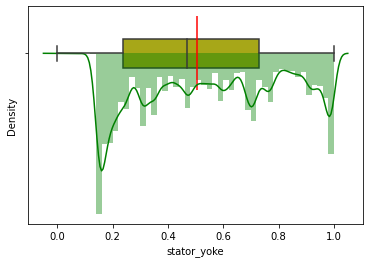

1.0888487043987054


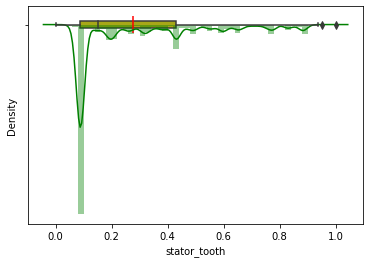

0.16720311839971


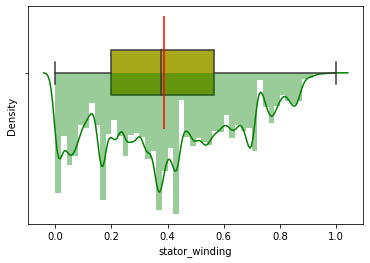

2.6060823646411357


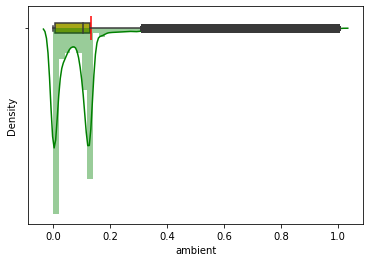

-0.852081784866733


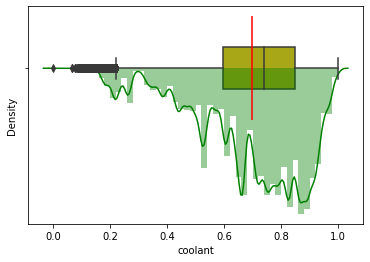

0.38787604148630245


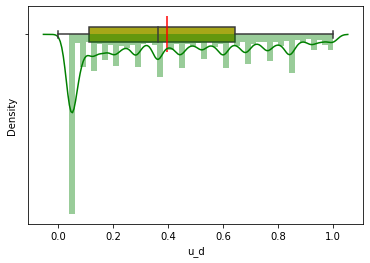

-0.7085542744066496


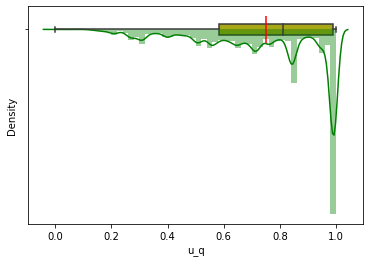

-0.156576995837365


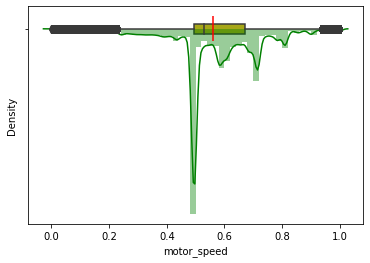

2.2150369620254597


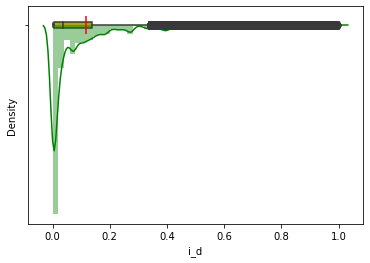

-0.306136038502652


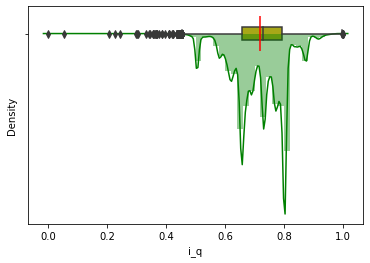

In [ ]:
for i in X_trans.columns:
    print(X_trans[i].skew())
    sns.distplot(X_trans[i],color='g')
    sns.boxplot(X_trans[i],color = 'y')
    plt.vlines(X_trans[i].mean(),ymin = -1,ymax = 1,color = 'r')
    plt.show()

* 변수들간 척도가 다르므로 모델링 작업전에 standardscaler를 통해 표준화를 진행. 각각의 값에 대한 표준편차 출력.

In [ ]:
from sklearn.preprocessing import StandardScaler
z = np.abs(StandardScaler().fit_transform(X_trans))
print(z)

[[0.30597098 0.64696854 0.20612598 ... 1.6009884  0.10923963 0.25799365]
 [0.76169323 0.92744181 0.65170572 ... 1.41713185 0.60582205 0.96467954]
 [0.34060082 2.01264189 1.32631096 ... 1.02630824 2.73387853 0.96857942]
 ...
 [0.59516532 0.71888112 1.08937365 ... 0.57263628 0.32939531 1.25234047]
 [0.39338751 0.8068349  1.52164796 ... 0.41910003 0.64753723 0.31163755]
 [0.4611335  0.77971966 0.1900004  ... 0.98525222 0.57191791 0.68322014]]


*   표준편차 3 이상인 값들 삭제후 인덱스를 다시 처음부터 재배열 

In [ ]:
X_trans = X_trans.drop(np.where(z > 3)[0][0:])
X_trans.reset_index(drop=True,inplace = True)
y = y.drop(np.where(z > 3)[0][0:])
y.reset_index(drop = True,inplace = True)

* x,y 전처리된 값들의 행렬 수 출력

In [ ]:
print(X_trans.shape)
print(X_trans.tail())
print(y.shape)
print(y.tail())

(1182186, 10)
         stator_yoke  stator_tooth  ...       i_d       i_q
1182181     0.236169      0.084059  ...  0.000001  0.632973
1182182     0.700593      0.556179  ...  0.229184  0.677801
1182183     0.339588      0.104013  ...  0.056718  0.606243
1182184     0.395684      0.082962  ...  0.000010  0.689402
1182185     0.633252      0.089452  ...  0.013489  0.656554

[5 rows x 10 columns]
(1182186,)
1182181    23.682182
1182182    71.247286
1182183    71.130157
1182184    34.549812
1182185    51.788338
Name: pm, dtype: float64


*   train, test 7:3으로 분리  

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.3, random_state=3)

* 회귀분석모형을 간단히 만들기 위해 상수항을 결합한 뒤 선형회귀분석

In [ ]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
print(X_train_const.head())
lin_reg = sm.OLS(y_train,X_train_const).fit()
lin_reg.summary()

         const  stator_yoke  stator_tooth  ...  motor_speed       i_d       i_q
965475     1.0     0.167059      0.088161  ...     0.493040  0.071612  0.777456
658111     1.0     0.825423      0.344618  ...     0.418432  0.037923  0.770806
312279     1.0     0.163044      0.319090  ...     0.494883  0.017037  0.675590
688350     1.0     0.428050      0.095705  ...     0.607085  0.071597  0.668966
1089879    1.0     0.494354      0.089222  ...     0.644304  0.001007  0.672728

[5 rows x 11 columns]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 3.513e+05
Date:                Wed, 16 Jun 2021   Prob (F-statistic):               0.00
Time:                        04:14:41   Log-Likelihood:            -2.9270e+06
No. Observations:              827530   AIC:                         5.854e+06
Df Residuals:                  827519   BIC:                         5.854e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -44.7479      0.204   -219.494      0.000     -45.148     -44.348
stator_yoke      -31.9418      0.081   -393.698      0.000     -32.101     -31.783
stator_tooth     -27.1935      0.114   -239.038      0.000     -27.416     -26.970
stator_winding    21.1665      0.185    114.652      0.000      20.805      21.528
ambient          -15.1434      0.117   -129.933      0.000     -15.372     -14.915
coolant           56.8328      0.193    294.684      0.000      56.455      57.211
u_d               45.9268      0.120    382.528      0.000      45.691      46.162
u_q               40.4860      0.132    305.856      0.000      40.227      40.745
motor_speed      -14.6757      0.133   -110.202      0.000     -14.937     -14.415
i_d               23.8665      0.190    125.403      0.000      23.493      24.239
i_q               52.1679      0.130    399.950      0.000      51.912      52.424
==============================================================================
Omnibus:                    36773.937   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            93819.707
Skew:                           0.241   Prob(JB):                         0.00
Kurtosis:                       4.577   Cond. No.                         63.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*   선형회귀를 통해 train데이터 예측 및 rmse값 계산

In [ ]:
y_train_pred = lin_reg.predict(X_train_const)
train_rmse = np.sqrt(np.sum(((y_train-y_train_pred)**2))/len(y_train))
train_rmse

8.315668796562088

*   회귀분석모형을 간단히 만들기 위해 상수항을 결합

In [ ]:
X_test_const = sm.add_constant(X_test)
y_test_pred = lin_reg.predict(X_test_const)
y_test_pred

482067     81.497735
1166084    63.660901
721979     51.602984
1066856    79.009217
398046     38.488661
             ...    
547415     54.789349
604520     48.736229
65797      70.019082
1040831    44.383044
1005975    51.177971
Length: 354656, dtype: float64

*   선형회귀를 통해 test데이터 예측 및 rmse값 계산

In [ ]:
test_rmse = np.sqrt(np.sum(((y_test-y_test_pred)**2))/len(y_test))
test_rmse

8.312896739194457

*   X값 변경

In [ ]:
X = X_trans

*   **PCA를 통한 차원축소**

In [ ]:
from sklearn.decomposition import PCA
pca  = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

*   축소된 차원 축 확인

In [ ]:
pca.explained_variance_ratio_

array([0.44438105, 0.24619151, 0.18122674, 0.05337918, 0.0309464 ,
       0.01660714, 0.01290984, 0.00826304, 0.00396045, 0.00213466])

*   PCA 축 누적 합산 값 확인


5개의 PCA축에서 전체의 95%를 커버하므로, PCA축을 5개로 결정함.

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.44438105, 0.69057257, 0.87179931, 0.92517849, 0.95612488,
       0.97273202, 0.98564186, 0.99390489, 0.99786534, 1.        ])

*   주성분 5개로 PCA

In [ ]:
pca5 = PCA(n_components=5)
X_pca = pca5.fit_transform(X)
X_pca

array([[ 0.12675659,  0.12329654, -0.01048355, -0.26616339,  0.05012795],
       [-0.08269705, -0.30813218, -0.2372867 ,  0.25326277, -0.26335327],
       [ 0.13563349,  0.73702762, -0.29747586, -0.26141113,  0.09285176],
       ...,
       [ 0.45177114,  0.10007525,  0.50443823,  0.10438443,  0.01963699],
       [-0.54628633, -0.27731323, -0.02214473,  0.07562408,  0.07146923],
       [ 0.11148495, -0.19147794,  0.17198353, -0.14207395, -0.03353521]])

*   PCA에 맞게 train test 7:3 분할

In [ ]:
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=3)

*   PCA이후 선형회귀 분석 정보 출력

In [ ]:
X_pca_train_const = sm.add_constant(X_pca_train)
lin_reg = sm.OLS(y_train,X_pca_train_const).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                 3.241e+05
Date:                Wed, 16 Jun 2021   Prob (F-statistic):               0.00
Time:                        04:14:45   Log-Likelihood:            -3.1640e+06
No. Observations:              827530   AIC:                         6.328e+06
Df Residuals:                  827524   BIC:                         6.328e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.1610      0.012   4696.074      0.000      57.137      57.185
x1            28.3394      0.028   1006.323      0.000      28.284      28.395
x2            27.3864      0.038    723.702      0.000      27.312      27.461
x3            -3.1589      0.044    -71.596      0.000      -3.245      -3.072
x4            15.6196      0.081    192.319      0.000      15.460      15.779
x5           -21.7640      0.107   -203.887      0.000     -21.973     -21.555
==============================================================================
Omnibus:                    20501.901   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43953.669
Skew:                           0.130   Prob(JB):                         0.00
Kurtosis:                       4.099   Cond. No.                         8.77
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*   선형회귀를 통해 train데이터 예측 및 rmse값 계산

In [ ]:
y_train_pred = lin_reg.predict(X_pca_train_const)
train_rmse = np.sqrt(np.sum(((y_train-y_train_pred)**2))/len(y_train))
train_rmse

11.072730253878317

*   회귀분석모형을 간단히 만들기 위해 상수항을 결합

In [ ]:
X_pca_test_const = sm.add_constant(X_pca_test)
y_test_pred = lin_reg.predict(X_pca_test_const)
y_test_pred

array([75.24588183, 62.42950999, 51.34206976, ..., 65.63973899,
       51.10972313, 46.45845833])

*   test셋에 대한 rsme 확인

*PCA를 하더라도 rsme값의 향상이 없음. 따라서 PCA 사용하지 않음*

In [ ]:
test_rmse = np.sqrt(np.sum(((y_test-y_test_pred)**2))/len(y_test))
test_rmse

11.065373684999901

*  **i_d및 i_q값 제거**

모델 학습시 큰 도움이 되지 못함을 분석을 통해 확인

In [ ]:
X_wo_dqi = X.drop(['i_d','i_q'],axis = 1)

*   제거한 feature에 맞게 train test 재설정

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_wo_dqi, y, test_size=0.3, random_state=3)

*   재설정한 train의 선형회귀 정보 출력

In [ ]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_train_const).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                 3.465e+05
Date:                Wed, 16 Jun 2021   Prob (F-statistic):               0.00
Time:                        04:14:46   Log-Likelihood:            -3.0045e+06
No. Observations:              827530   AIC:                         6.009e+06
Df Residuals:                  827521   BIC:                         6.009e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -14.9812      0.209    -71.808      0.000     -15.390     -14.572
stator_yoke      -29.7063      0.088   -336.887      0.000     -29.879     -29.533
stator_tooth      -9.7791      0.069   -142.009      0.000      -9.914      -9.644
stator_winding    31.0328      0.153    202.800      0.000      30.733      31.333
ambient          -15.9765      0.128   -125.148      0.000     -16.227     -15.726
coolant           57.8511      0.178    325.422      0.000      57.503      58.200
u_d               46.0548      0.132    349.319      0.000      45.796      46.313
u_q               44.1558      0.144    306.315      0.000      43.873      44.438
motor_speed      -20.0443      0.146   -137.749      0.000     -20.329     -19.759
==============================================================================
Omnibus:                    43054.013   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           169896.983
Skew:                           0.041   Prob(JB):                         0.00
Kurtosis:                       5.218   Cond. No.                         55.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*   train의 선형회귀 rmse값 확인

In [ ]:
y_train_pred = lin_reg.predict(X_train_const)
train_rmse = np.sqrt(np.sum(((y_train-y_train_pred)**2))/len(y_train))
train_rmse

9.13183317925852

*   회귀분석모형을 간단히 만들기 위해 상수항을 결합

In [ ]:
X_test_const = sm.add_constant(X_test)
y_test_pred = lin_reg.predict(X_test_const)
y_test_pred

482067     80.144801
1166084    66.161647
721979     53.810469
1066856    74.201104
398046     39.026889
             ...    
547415     53.944179
604520     45.657550
65797      67.865413
1040831    44.189966
1005975    47.962722
Length: 354656, dtype: float64

*   test의 선형회귀 rmse값 확인

*rmse값의 향상 없음. 따라서 성분을 따로 제거하지 않음.*

In [ ]:
test_rmse = np.sqrt(np.sum(((y_test-y_test_pred)**2))/len(y_test))
test_rmse

9.130823228523424

*   **motor_speed 제거**

In [ ]:
X_wo_ms = X.drop(['motor_speed'],axis = 1)

*   제거된 feature에 맞춰 train test을 7:3으로 재분할

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_wo_ms, y, test_size=0.3, random_state=3)

*   재분할된 train test를 통해 선형회귀 분석

In [ ]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
lin_reg = sm.OLS(y_train,X_train_const).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     pm   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                 3.834e+05
Date:                Wed, 16 Jun 2021   Prob (F-statistic):               0.00
Time:                        04:14:46   Log-Likelihood:            -2.9331e+06
No. Observations:              827530   AIC:                         5.866e+06
Df Residuals:                  827520   BIC:                         5.866e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -62.9249      0.121   -521.359      0.000     -63.161     -62.688
stator_yoke      -36.9121      0.068   -543.347      0.000     -37.045     -36.779
stator_tooth     -26.6287      0.114   -232.611      0.000     -26.853     -26.404
stator_winding    21.2323      0.186    114.175      0.000      20.868      21.597
ambient           -5.9524      0.082    -72.586      0.000      -6.113      -5.792
coolant           55.9902      0.194    288.435      0.000      55.610      56.371
u_d               55.1828      0.086    638.553      0.000      55.013      55.352
u_q               49.7873      0.103    484.710      0.000      49.586      49.989
i_d               24.0881      0.192    125.656      0.000      23.712      24.464
i_q               53.5993      0.131    409.979      0.000      53.343      53.856
==============================================================================
Omnibus:                    32524.231   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            71457.405
Skew:                           0.256   Prob(JB):                         0.00
Kurtosis:                       4.345   Cond. No.                         60.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*   train셋 선형회귀 후 rsme 값 확인

In [ ]:
y_train_pred = lin_reg.predict(X_train_const)
train_rmse = np.sqrt(np.sum(((y_train-y_train_pred)**2))/len(y_train))
train_rmse

8.376465454691793

*   회귀분석모형을 간단히 만들기 위해 상수항을 결합

In [ ]:
X_test_const = sm.add_constant(X_test)
y_test_pred = lin_reg.predict(X_test_const)
y_test_pred

482067     81.622074
1166084    63.529215
721979     50.742201
1066856    78.636215
398046     37.699172
             ...    
547415     54.654877
604520     49.818299
65797      69.927232
1040831    45.625289
1005975    51.937393
Length: 354656, dtype: float64

*   test셋의 선형회귀 후 rmse값 확인

*모터속도 제거 이후에도 rmse값 개선 없음. 따라서 제거하지 않음.*

In [ ]:
test_rmse = np.sqrt(np.sum(((y_test-y_test_pred)**2))/len(y_test))
test_rmse

8.3743640348164

*   y값 dataframe형식으로 변환

In [ ]:
y = pd.DataFrame(y)

*   선형회귀와 릿지, 라쏘 모델 선언


여기서부터 실행속도 문제로 사용하지 않는 모델에 대한내용 및 파라메터 찾는 부분 주석처리

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# lr = LinearRegression()
# ridge = Ridge(alpha = 20000)
lasso = Lasso(alpha = 0.012)

*   위의 모델들 k-fold교차검증을 통해 성능 측정

결과 :

RMSE scores : 69.138 (+/- 0.07903380) [LR]

RMSE scores : 108.650 (+/- 0.19332649) [Ridge]

RMSE scores : 69.437 (+/- 0.08672162) [Lasso]

In [ ]:
# from sklearn.model_selection import KFold
# from sklearn import metrics
# kf = KFold(n_splits=5,shuffle=True,random_state=0)
# for model,name in zip([lr,ridge,lasso],['LR','Ridge','Lasso']):
#     mse_li = []
#     for train_idx,test_idx in kf.split(X,y):
#         X_train,X_test = X.iloc[train_idx,:],X.iloc[test_idx,:]
#         y_train,y_test = y.iloc[train_idx,:],y.iloc[test_idx,:]
#         model.fit(X_train,y_train)
#         y_pred = model.predict(X_test)
#         mse = metrics.mean_squared_error(y_test,y_pred)
#         mse_li.append(mse)
#     print('RMSE scores : %0.03f (+/- %0.08f) [%s]'%(np.mean(mse_li), np.var(mse_li,ddof = 1), name))
#     print()

*   랜덤포레스트 모델 및 의사트리 모델 선언 후 최선의 파라미터 찾기


결과 :

{'criterion': 'mse', 'max_depth': 6}

{'max_depth': 6, 'n_estimators': 65}

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint
# dt = DecisionTreeRegressor(random_state=0)
# rf = RandomForestRegressor(random_state=0,n_jobs = -1)
# param_dt = {
#         'criterion' : ['mse','mae'],
#         'max_depth' : randint(1,11)
# }
# param_rf = {
#         'n_estimators' : randint(1,70),
#         'max_depth' : randint(1,11)
# }
# rscv_dt = RandomizedSearchCV(dt,param_dt,scoring='neg_mean_squared_error',cv = 5,n_jobs=1,n_iter = 2,verbose = 1000,random_state = 0)
# rscv_rf = RandomizedSearchCV(rf,param_rf,scoring='neg_mean_squared_error',cv = 5,n_jobs=-1,n_iter = 2,verbose = 1000,random_state = 0)
# rscv_dt.fit(X,y)
# rscv_rf.fit(X,y)
# print(rscv_dt.best_params_)
# print(rscv_rf.best_params_)

*   랜덤포레스트 모델 및 의사트리 모델 파라미터값 확정

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# dt = DecisionTreeRegressor(criterion='mse',max_depth=6,random_state=0)
# rf = RandomForestRegressor(n_estimators=65,max_depth=6,random_state=0,n_jobs = -1)

*   k-fold를 통해 위의 모델들 성능 측정

결과 :

RMSE scores : 55.124 (+/- 0.19085850) [DT]

RMSE scores : 53.777 (+/- 0.07538982) [RF]



In [ ]:
# from sklearn.model_selection import KFold
# from sklearn import metrics
# kf = KFold(n_splits=5,shuffle=True,random_state=0)
# for model,name in zip([dt,rf],['DT','RF']):
#     mse_li = []
#     for train_idx,test_idx in kf.split(X,y):
#         X_train,X_test = X.iloc[train_idx,:],X.iloc[test_idx,:]
#         y_train,y_test = y.iloc[train_idx,:],y.iloc[test_idx,:]
#         model.fit(X_train,y_train)
#         y_pred = model.predict(X_test)
#         mse = metrics.mean_squared_error(y_test,y_pred)
#         mse_li.append(mse)
#     print('RMSE scores : %0.03f (+/- %0.08f) [%s]'%(np.mean(mse_li), np.var(mse_li,ddof = 1), name))
#     print()

*   Bagging 모델 선언 후 최선의 파라미터 찾기

결과 :

LinearRegression 1

Lasso 3

Ridge 1

DT 20


In [ ]:
from sklearn.ensemble import BaggingRegressor
# from sklearn.model_selection import KFold, cross_val_score
# models = []
# models.append(("LinearRegression",lr))
# models.append(("Lasso",lasso))
# models.append(("Ridge",ridge))
# models.append(("DT",dt))
# for name,model in models:
#     mse_var = []
#     for val in np.arange(1,21):
#         bg_model = BaggingRegressor(base_estimator=model,n_estimators=val,n_jobs=-1,verbose = 1000, random_state = 0)
#         kfold = KFold(n_splits=5,shuffle=True,random_state=0)
#         results = cross_val_score(bg_model,X,y,cv=kfold,n_jobs=-1,scoring='neg_mean_squared_error',verbose = 1000)
#         mse_var.append(np.var(results,ddof = 1))
#     print(name,np.argmin(mse_var)+1)

*   AdaBoost 모델 선언 후 최선의 파라미터 찾기

결과 :

LinearRegression 1

Lasso 1

Ridge 5

DT 19

RF 19


In [ ]:
# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.model_selection import KFold, cross_val_score
# models = []
# models.append(("LinearRegression",lr))
# models.append(("Lasso",lasso))
# models.append(("Ridge",ridge))
# models.append(("DT",dt))
# models.append(("RF",rf))
# for name,model in models:
#     mse_mean = []
#     for val in np.arange(1,21):
#         bg_model = AdaBoostRegressor(base_estimator=model,n_estimators=val, random_state = 0)
#         kfold = KFold(n_splits=5,shuffle=True,random_state=0)
#         results = cross_val_score(bg_model,X,y,cv=kfold,n_jobs=-1,scoring='neg_mean_squared_error',verbose = 1000)
#         mse_mean.append(np.mean(results))
#     print(name,np.argmax(mse_mean)+1)

*   Bagging 및 AdaBoost 를 통한 회귀 및 트리모델 파라미터 확정 및 선언

In [ ]:
# #Bagging Models
# LR_bag = BaggingRegressor(base_estimator = lr,n_estimators = 1,random_state = 0,n_jobs = -1)
lasso_bag = BaggingRegressor(base_estimator = lasso,n_estimators = 3,random_state = 0,n_jobs = -1)
# DT_bag = BaggingRegressor(base_estimator = dt,n_estimators = 20,random_state = 0,n_jobs = -1,verbose = 1000)
# ridge_bag = BaggingRegressor(base_estimator = ridge,n_estimators = 1,random_state = 0,n_jobs = -1) 
# # #Boosting models
# lasso_boost = AdaBoostRegressor(base_estimator = lasso,n_estimators = 1,random_state = 0)
# ridge_boost = AdaBoostRegressor(base_estimator = ridge,n_estimators = 5,random_state = 0)
# DT_boost = AdaBoostRegressor(base_estimator = dt,n_estimators = 19,random_state = 0)
# RF_boost = AdaBoostRegressor(base_estimator = rf,n_estimators = 19,random_state = 0)

*   GradientBoostingRegressor 선언

In [ ]:
# from sklearn.ensemble import GradientBoostingRegressor
# GBC = GradientBoostingRegressor(n_estimators = 100,random_state = 0)

*   위에서 확인한 모델들 배열에 합치기

In [ ]:
# models = []
# models.append(('LR Bagged',LR_bag))
# models.append(('Lasso Bagged',lasso_bag))
# models.append(('Lasso Boosted',lasso_boost))
# models.append(('Ridge Bagged',ridge_bag))
# models.append(('Ridge Boosted',ridge_boost))
# models.append(('DTree Bagged',DT_bag))
# models.append(('DTree Boosted',DT_boost))
# models.append(('Gradient Boost',GBC))
# models.append(('RF Boosted',RF_boost))

*   교차검증 진행

결과 :

LR Bagged  :  -69.13923158307117  --  0.07797414014270668

Lasso Bagged  :  -69.43170146911325  --  0.08667948425866916

Lasso Boosted  :  -69.43158408067362  --  0.08578236049267378

Ridge Bagged  :  -108.60026388828985  --  0.17420839258496645

Ridge Boosted  :  -101.98815610940093  --  0.14878877898863735

DTree Bagged  :  -53.95248994905781  --  0.18420526940563825

DTree Boosted  :  -34.69180273981216  --  0.04163598504218702

Gradient Boost  :  -33.91245056364396  --  0.08680763401891939

RF Boosted  :  -34.688803443804915  --  0.9154216221293175

RF Boosted  :  -75.05552971798699  --  0.5400471574994693

In [ ]:
# results = []
# names = []
# for name, model in models:
#     kfold = KFold(n_splits = 5,random_state = 0,shuffle = True)
#     cv_results = cross_val_score(model,X,y,cv = kfold,scoring='neg_mean_squared_error',n_jobs = -1)
#     results.append(cv_results)
#     names.append(name)
#     print(name,' : ',np.mean(cv_results),' -- ',np.var(cv_results,ddof = 1))

# **5. 모델 학습 및 검증**

*   lasso에 Bagging 결합한 모델 선택

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error
lasso_bag.fit(X,y)
test_pred = lasso_bag.predict(X_df_test)

In [ ]:
test_pred

array([19.8418508 , 17.90627789, 12.52036074, ..., 82.25888763,
       81.06737732, 81.86181439])

*   결과값 그래프화

In [ ]:
pred_y = pd.DataFrame({
        "label" : test_pred
    })

In [ ]:
real_y = pd.DataFrame({
        "label": y_df_test
    })

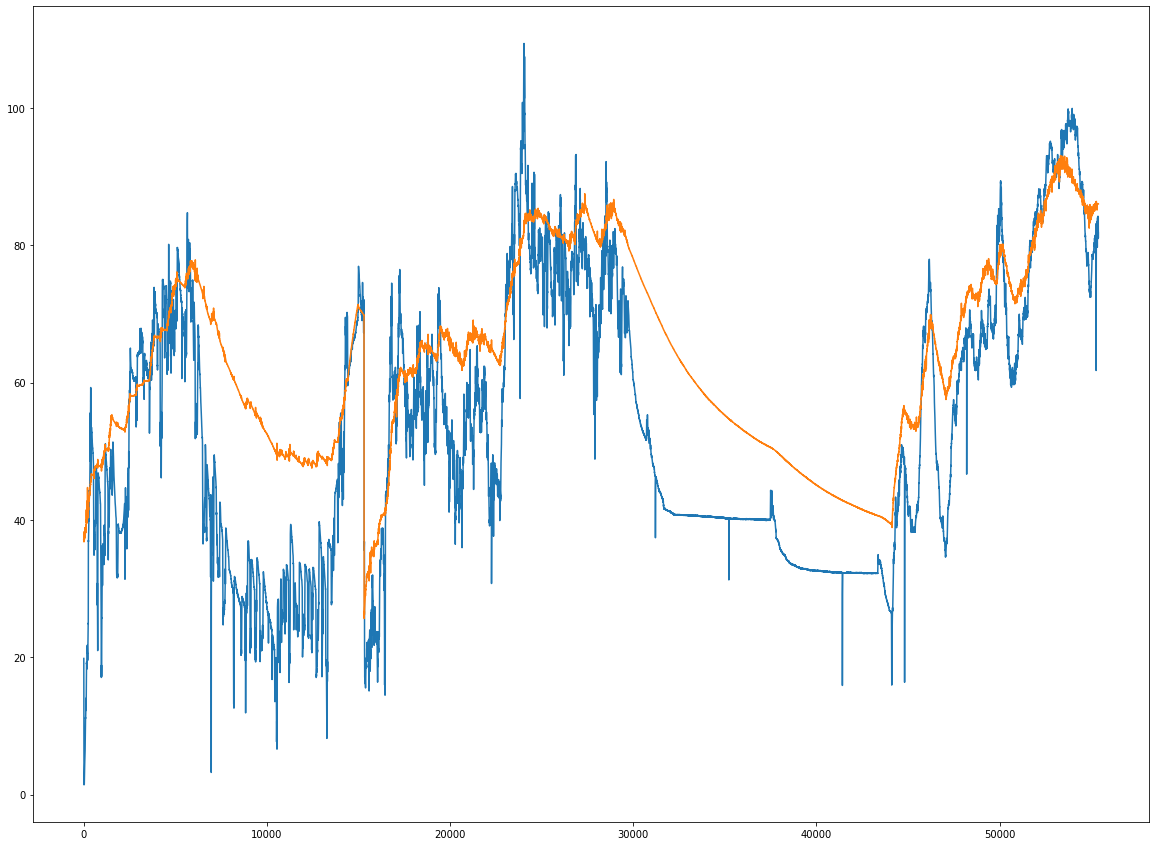

In [ ]:
plt.figure(figsize=(20,15))
pred_y['label'].plot(label='pm')
real_y['label'].plot(label='pm')
plt.show()

# **6. 모델 추출**

*   모델 덤프

In [ ]:
import pickle
s = pickle.dumps(lasso_bag)
dumped = pickle.loads(s)

*   덤프된 모델을 통한 예측

In [ ]:
dumped_pred = dumped.predict(X_df_test)
dumped_pred

array([19.8418508 , 17.90627789, 12.52036074, ..., 82.25888763,
       81.06737732, 81.86181439])

*   덤프된 모델 예측 결과 그래프화

In [ ]:
dump_pred_y = pd.DataFrame({
        "label" : dumped_pred
    })

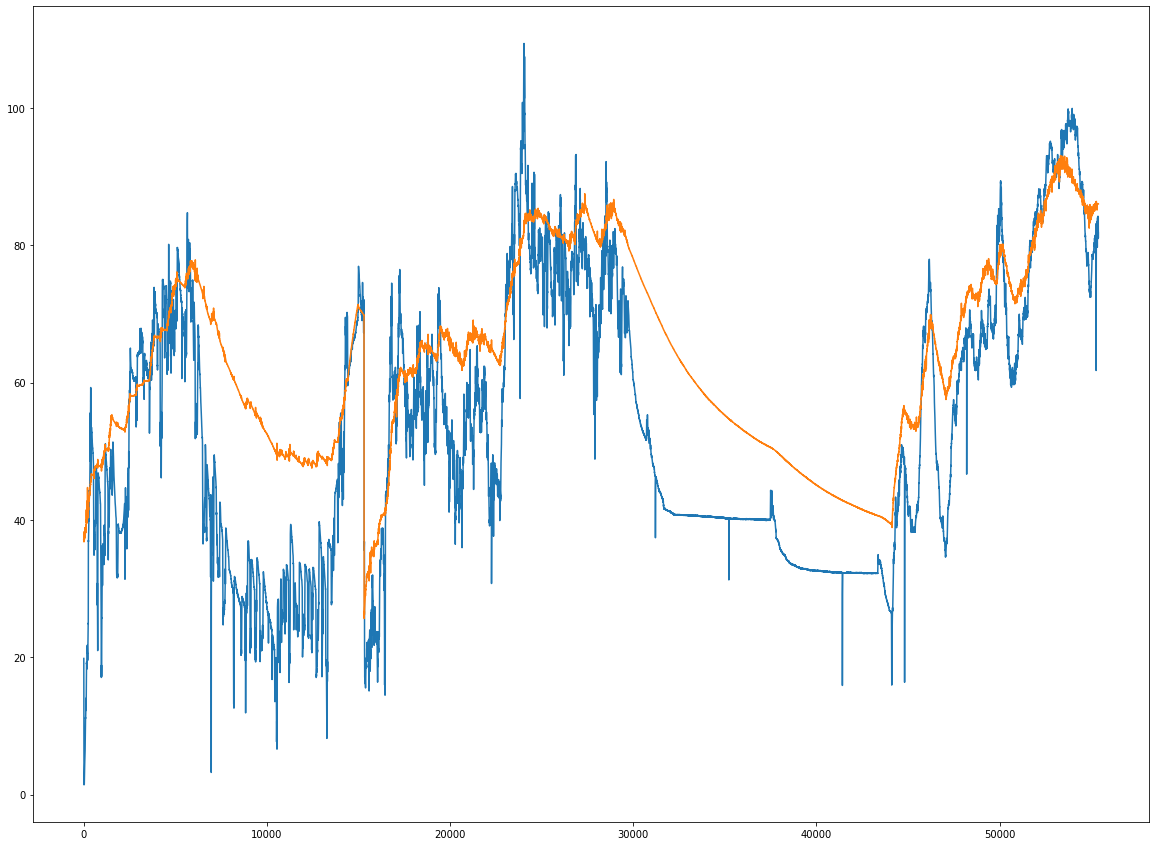

In [ ]:
plt.figure(figsize=(20,15))
dump_pred_y['label'].plot(label='pm')
real_y['label'].plot(label='pm')
plt.show()

*   덤프한 모델 pkl로 저장

In [ ]:
import joblib
joblib.dump(dumped, 'PMSM_PM_TEMP_PREDICT_MODEL.pkl')

['PMSM_PM_TEMP_PREDICT_MODEL.pkl']

# **7. 결과 및 첨언**

*   과제의 목적을 클러스터링이 아닌 회귀모델을 이용한 온도 예측으로 잡음으로써, 기존 수업에서 배웠던 다수의 코드들을 이용하기 어려웠음.

*   stator관련 온도가 pm과 유사한 측정치를 나타내어 pm의 온도가 올라갈 때의 예측은 상대적으로 정확하게 나타났으나, 모터의 온도가 전반적으로 떨어지는 경우에 있어서는 pm의 온도가 타 feature들보다 낮게 떨어지므로 예측된 온도가 실제 온도보다 낮은 값을 나타냄.

*   최적의 파라미터를 찾는 데 하루이상의 시간이 소요되는 경우도 종종 있었음. 이에 작업 전반의 효율이 낮아지는 경향이 있었으며, 보다 상세한 모델 제작에 어려움을 느낌.

*   모델의 정확도 평가에는 rmse를 사용.